In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Data**

In [64]:
train_df = pd.read_csv('/Users/hailing/Downloads/Assignment_Classification/train.csv')
test_df = pd.read_csv('/Users/hailing/Downloads/Assignment_Classification/test.csv')

In [3]:
train_df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


**Data Exploration**

In [4]:
train_df.shape

(614, 10)

In [5]:
test_df.shape

(154, 9)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   154 non-null    int64  
 1   no_times_pregnant      154 non-null    int64  
 2   glucose_concentration  154 non-null    int64  
 3   blood_pressure         154 non-null    int64  
 4   skin_fold_thickness    154 non-null    int64  
 5   serum_insulin          154 non-null    int64  
 6   bmi                    154 non-null    float64
 7   diabetes pedigree      154 non-null    float64
 8   age                    154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [8]:
train_df.columns.values

array(['p_id', 'no_times_pregnant', 'glucose_concentration',
       'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi',
       'diabetes pedigree', 'age', 'diabetes'], dtype=object)

In [9]:
train_df.count()

p_id                     614
no_times_pregnant        614
glucose_concentration    614
blood_pressure           614
skin_fold_thickness      614
serum_insulin            614
bmi                      614
diabetes pedigree        614
age                      614
diabetes                 614
dtype: int64

In [10]:
train_df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


**Check for null values**

In [11]:
train_df.isnull().sum().sort_values(ascending=False)

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [65]:
test_df.isnull().sum().sort_values(ascending=False)

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
dtype: int64

Comments: Since there are no null values, no further action needed to replace/drop columns with missing values.

**Dropping irrelavant columns**

The "p_id" isn't a useful input for our ML model, so we'll just drop it.

In [12]:
train_df=train_df.drop('p_id', axis=1)
train_df.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1


In [13]:
test_df=test_df.drop('p_id', axis=1)
test_df.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,12,140,85,33,0,37.4,0.244,41
1,6,102,90,39,0,35.7,0.674,28
2,7,97,76,32,91,40.9,0.871,32
3,7,179,95,31,0,34.2,0.164,60
4,6,87,80,0,0,23.2,0.084,32


**Distribution in histogram**

array([[<Axes: title={'center': 'no_times_pregnant'}>,
        <Axes: title={'center': 'glucose_concentration'}>,
        <Axes: title={'center': 'blood_pressure'}>],
       [<Axes: title={'center': 'skin_fold_thickness'}>,
        <Axes: title={'center': 'serum_insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'diabetes pedigree'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

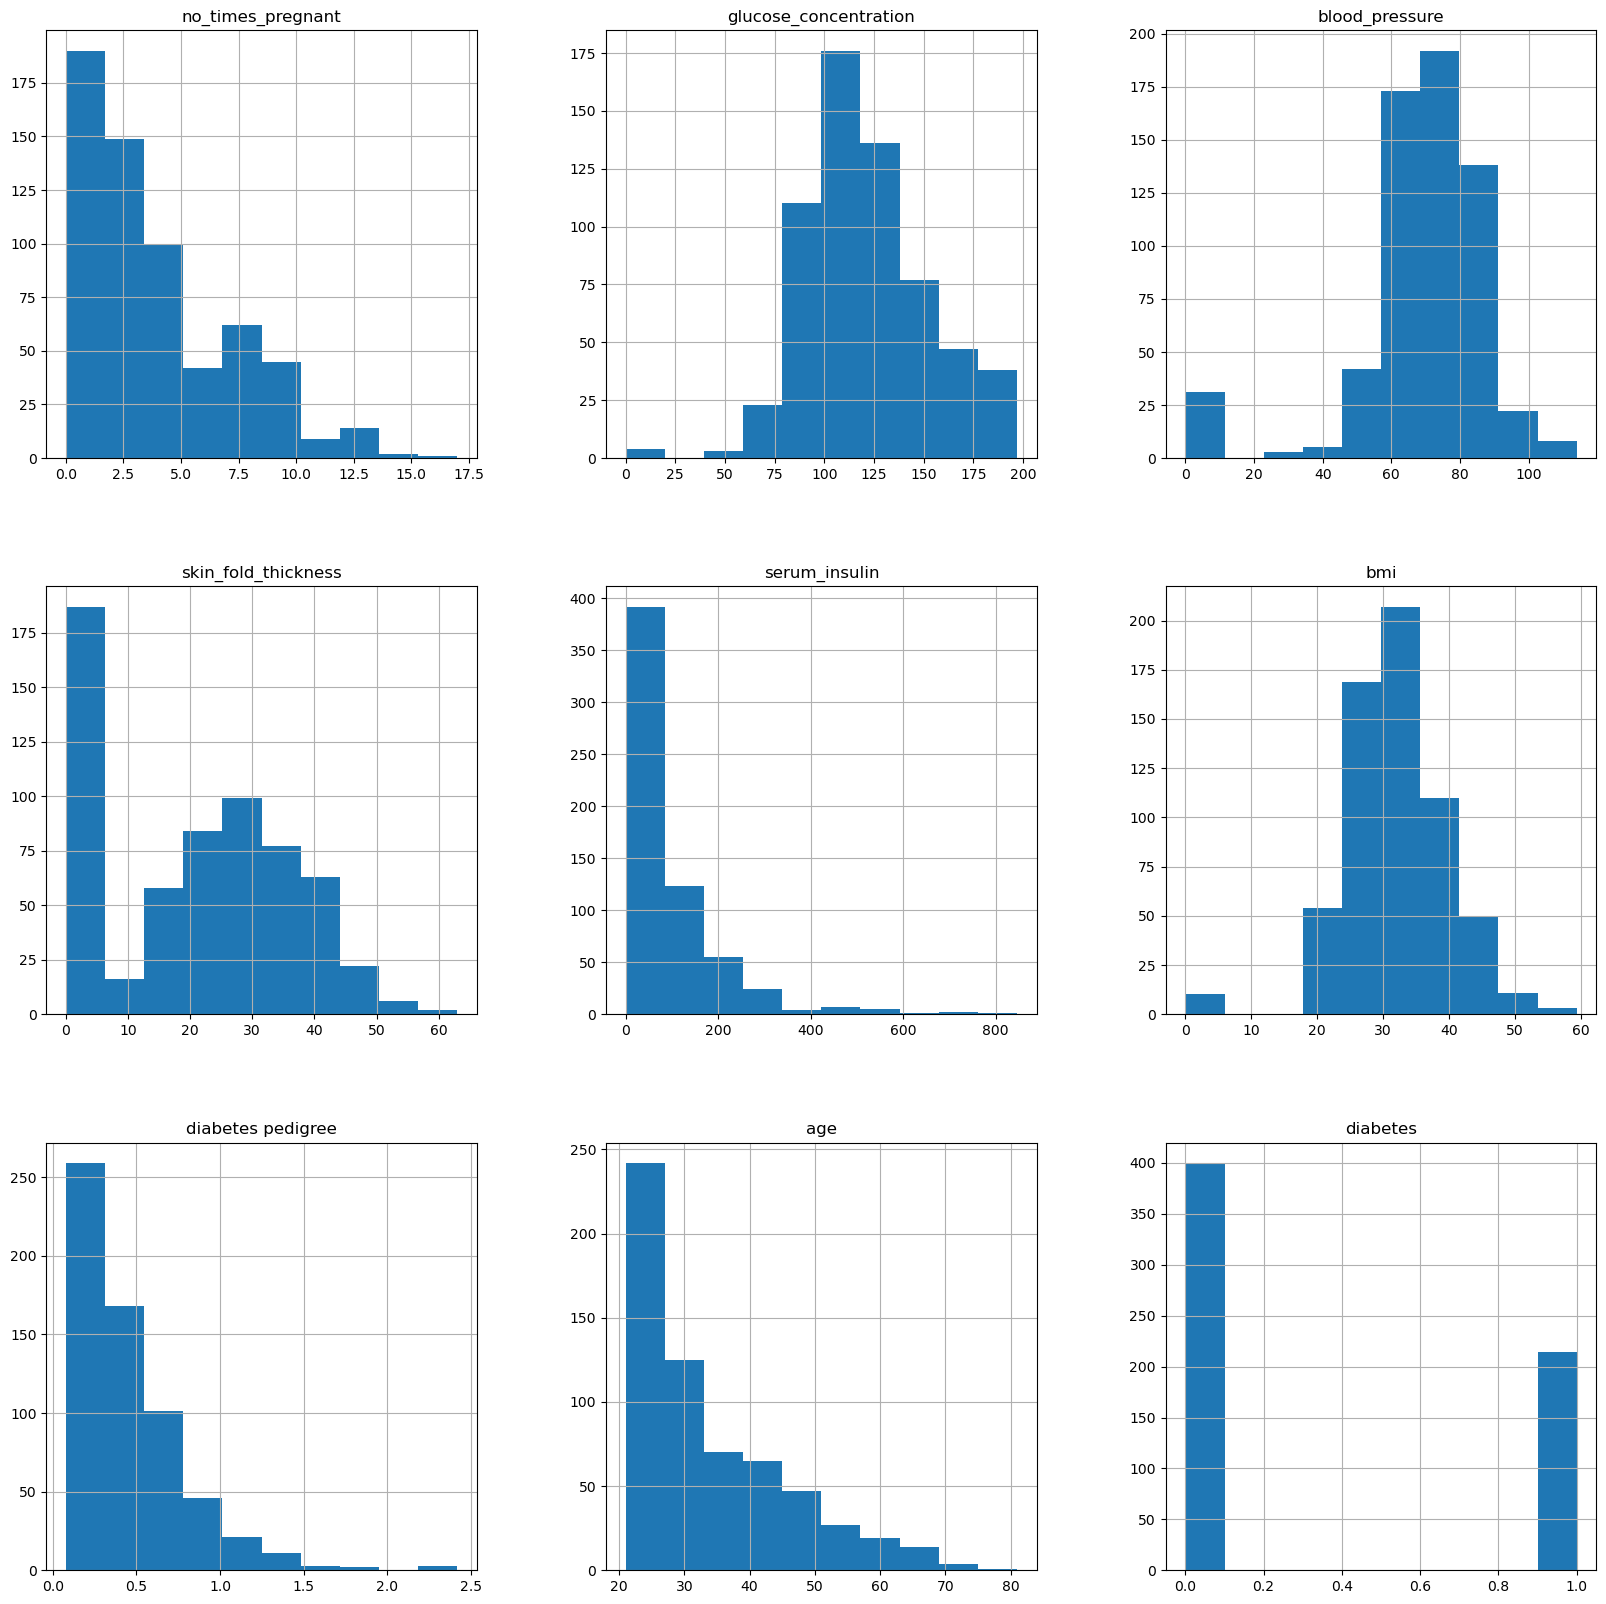

In [14]:
train_df.hist(figsize = (20,20))

**Scatter plot to show the relationship between each variables**

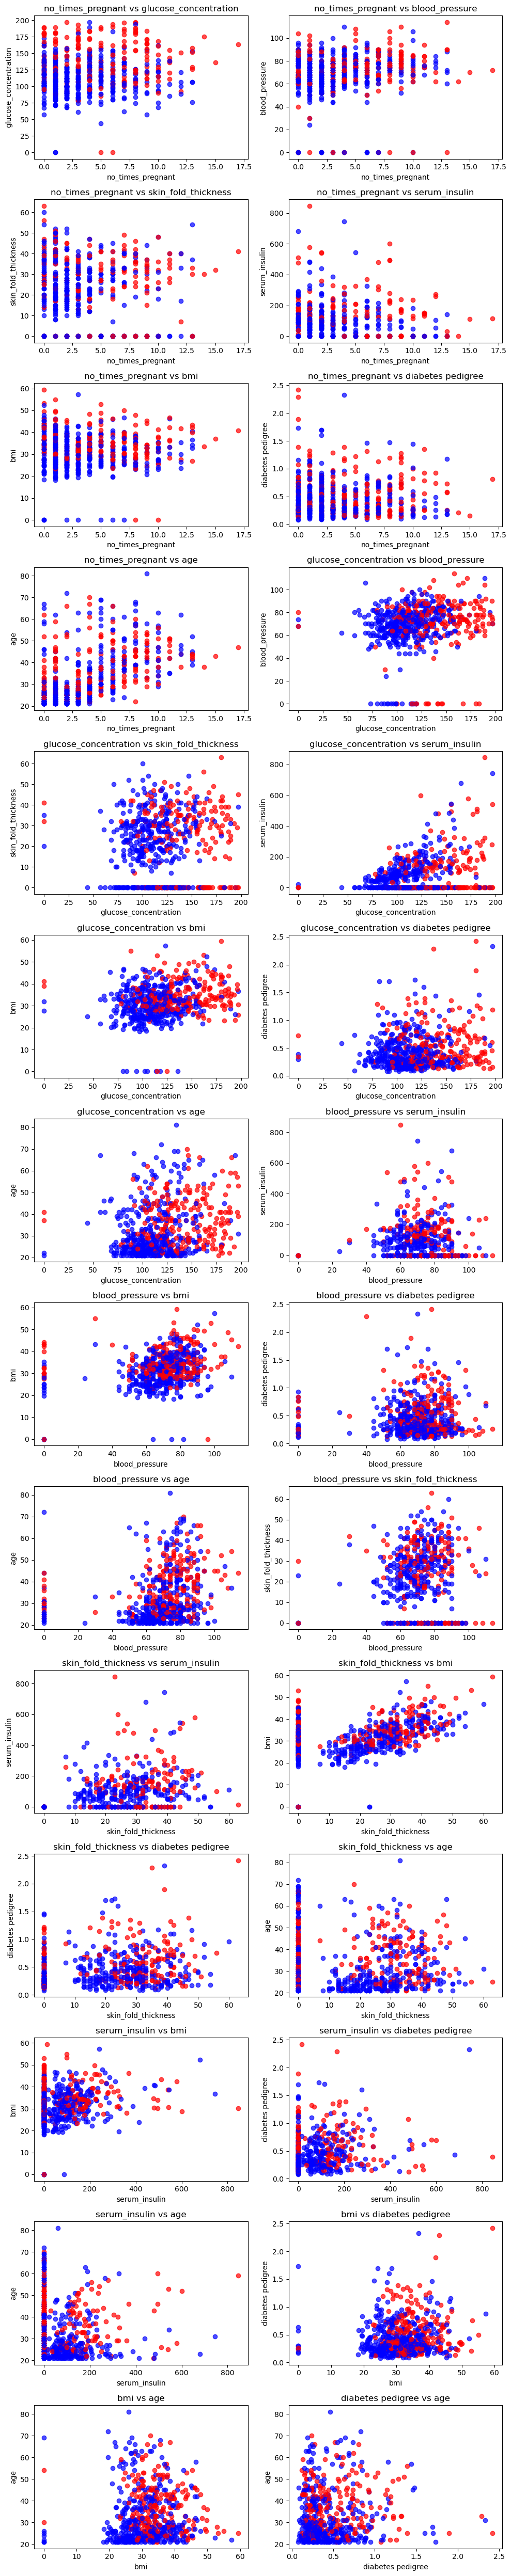

In [15]:
columns_to_plot = [
    ('no_times_pregnant', 'glucose_concentration'),
    ('no_times_pregnant', 'blood_pressure'),
    ('no_times_pregnant', 'skin_fold_thickness'),
    ('no_times_pregnant', 'serum_insulin'),
    ('no_times_pregnant', 'bmi'),
    ('no_times_pregnant', 'diabetes pedigree'),
    ('no_times_pregnant', 'age'),
    ('glucose_concentration', 'blood_pressure'),
    ('glucose_concentration', 'skin_fold_thickness'),
    ('glucose_concentration', 'serum_insulin'),
    ('glucose_concentration', 'bmi'),
    ('glucose_concentration', 'diabetes pedigree'),
    ('glucose_concentration', 'age'),
    ('blood_pressure', 'serum_insulin'),
    ('blood_pressure', 'bmi'),
    ('blood_pressure', 'diabetes pedigree'),
    ('blood_pressure', 'age'),
    ('blood_pressure', 'skin_fold_thickness'),
    ('skin_fold_thickness', 'serum_insulin'),
    ('skin_fold_thickness', 'bmi'),
    ('skin_fold_thickness', 'diabetes pedigree'),
    ('skin_fold_thickness', 'age'),
    ('serum_insulin', 'bmi'),
    ('serum_insulin', 'diabetes pedigree'),
    ('serum_insulin', 'age'),
    ('bmi', 'diabetes pedigree'),
    ('bmi', 'age'),
    ('diabetes pedigree', 'age')
]

# Map diabetes values to colors
color_map = {0: 'blue', 1: 'red'}

# Create a new figure with a fixed size
plt.figure(figsize=(10, 50))

for i, (x_col, y_col) in enumerate(columns_to_plot, start=1):
    plt.subplot(14,2, i)
    
    # Iterate through the DataFrame rows
    for index, row in train_df.iterrows():
        diabetes_val = row['diabetes']  
        color = color_map[diabetes_val]
        plt.scatter(row[x_col], row[y_col], alpha=0.7, label=f'diabetes: {diabetes_val}', color=color)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.tight_layout()
    
plt.show()


**Count of target variables**

0    400
1    214
Name: diabetes, dtype: int64


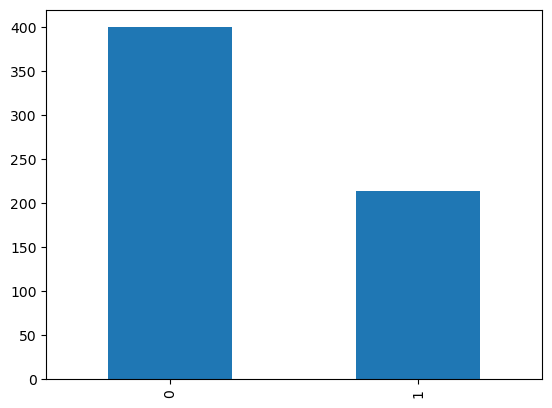

In [16]:
print(train_df.diabetes.value_counts())
p=train_df.diabetes.value_counts().plot(kind="bar")

**Scaling and splitting the data**

In [66]:
X= train_df.drop('diabetes', axis=1)
y= train_df['diabetes']
X_test = test_df

In [67]:
test_df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


In [68]:
X.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,316,2,112,68,22,94,34.1,0.315,26
1,25,11,143,94,33,146,36.6,0.254,51
2,710,2,93,64,32,160,38.0,0.674,23
3,658,1,120,80,48,200,38.9,1.162,41
4,542,3,128,72,25,190,32.4,0.549,27


In [69]:
y

0      0
1      1
2      1
3      0
4      1
      ..
609    1
610    0
611    0
612    0
613    0
Name: diabetes, Length: 614, dtype: int64

In [70]:
# Splitting the data into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
y_test.count()

154

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [73]:
X_train_sc

array([[-0.96369154,  0.64982759, -1.18348449, ..., -0.1372536 ,
        -0.25787709,  0.8007045 ],
       [-1.65327816, -0.24693448,  0.16624747, ...,  0.91221679,
         0.66680469, -0.50664549],
       [ 1.09622748,  0.64982759,  0.8575736 , ..., -0.35751282,
        -0.84370034,  1.49795782],
       ...,
       [ 0.34475487, -1.14369656, -0.06419457, ...,  0.84743467,
        -0.61109405, -0.94242881],
       [ 1.1492726 , -0.84477587, -0.49215836, ...,  0.25143914,
        -0.94708091, -0.94242881],
       [-0.67636378,  0.05198621, -0.98596274, ...,  0.10891846,
        -0.07408941, -0.94242881]])

In [74]:
X_test_sc

array([[ 0.52157196,  1.54658967, -0.98596274, ..., -1.04420332,
        -0.78052332,  2.19521114],
       [-0.45976285, -1.14369656, -1.41392654, ...,  0.6012626 ,
        -0.1085496 , -1.02958548],
       [ 0.91498997,  0.64982759, -0.82136128, ..., -1.10898545,
        -0.80924015, -0.41948882],
       ...,
       [ 1.30398755, -0.84477587,  0.75881273, ...,  1.79325366,
        -0.39284617,  1.14933116],
       [ 0.19446035, -0.84477587, -0.78844099, ..., -1.8215888 ,
        -0.9327225 , -1.02958548],
       [-1.37479126, -1.14369656, -0.65675982, ..., -0.99237762,
        -0.67427107, -0.94242881]])

**kNN Classifier**

In [75]:
# Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Initiating the classifier
knn_model = KNeighborsClassifier()

# Passing the data to classifier
knn_model.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [77]:
# Predict on the validation set
y_pred = knn_model.predict(X_test_sc)

In [78]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [79]:
y_test

350    0
377    0
163    0
609    1
132    0
      ..
535    0
468    1
582    1
291    0
75     0
Name: diabetes, Length: 154, dtype: int64

In [80]:
# Classification metrics = to check how the model is behaving
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

73.37662337662337


**Decision Tree Classifier**

In [81]:
# Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt = DecisionTreeClassifier()

# Passing the data to classifier
model_dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [82]:
y_pred_dt = model_dt.predict(X_test_sc)

In [83]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_dt)*100)

68.83116883116884


**Random Forest Classifier**

In [84]:
# Call the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initiating the classifier
model_rf = RandomForestClassifier(n_estimators=200)

# Passing the data to classifier
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [85]:
y_pred_rf = model_rf.predict(X_test_sc)

/Users/hailing/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_rf)*100)

62.33766233766234


#### Ensemble Learning - Boosting

In [87]:
# Call the AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Initiating the classifier
model_ada = AdaBoostClassifier(n_estimators=100)

# Passing the data to classifier
model_ada.fit(X_train_sc, y_train)

AdaBoostClassifier(n_estimators=100)

In [88]:
y_pred_ada = model_ada.predict(X_test_sc)

In [89]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_ada)*100)

74.67532467532467


**Final thoughts:**
1. There are no null values in the dataset.
2. All the models are performing with more than 60% of accuracy.